# Casting Quality Control<a id='Casting Quality Control'></a>

## 3. Data Processing and Training<a id='Data_Processing_and_Training'></a>

* [3.1 Introduction](#3.1_Introduction)
* [3.2 Package Importing](#3.2_Package_Importing)
* [3.3 Data Training](#3.3_Data_Training)
  * [3.3.1 Image Data Generating](#3.3.1_Image_Data_Generating)
  * [3.3.2 Neural Networks Initialization](#3.3.2_Neural_Networks_Initialization)
  * [3.3.3 Model Training](#3.3.3_Model_Training)
  * [3.3.4 Model Evaluation](#3.3.4_Model_Evaluation)
  * [3.3.5 Model Summary](#3.3.5_Model_Summary)
* [3.4 Reducing Overfitting](#3.4_Reducing_Overfitting)
  * [3.4.1 Model Modification](#3.4.1_Model_Modification)
  * [3.4.2 Model_2 Training](#3.4.2_Model_2_Training)
  * [3.4.3 Model_2 Evaluation](#3.4.3_Model_2_Evaluation)
  * [3.4.4 Epoch Review](#3.4.4_Epoch_Review)
  * [3.4.5 Model_2 Summary](#3.4.5_Model_2_Summary)
* [3.5 Advanced Model](#3.5_Advanced_Model)
  * [3.5.1 Model_3 Developing](#3.5.1_Model_3_Developing)
  * [3.5.2 Model_3 Training](#3.5.2_Model_3_Training)
  * [3.5.3 Model_3 Evaluation](#3.5.3_Model_3_Evaluation)
  * [3.5.4 Epoch Review](#3.5.4_Epoch_Review)
  * [3.5.5 Model_3 Summary](#3.5.5_Model_3_Summary)
* [3.6 Summary](#3.6_Summary)
  * [3.6.1 Model Selection](#3.6.1_Model_Selection)
  * [3.6.2 Future Steps](#3.6.2_Future_Steps)


## 3.1 Introduction<a id='3.1_Introduction'></a>

In the preceding notebook, the focus was on Data Wrangling and Exploratory Data Analysis (EDA). The dataset has been restructured into three distinct subsets after resizing images:

* **Train Set**: This subset constitutes 76.7% of the data and includes augmented images. The enhancements applied to these images are intended to increase the dataset's variance, which is pivotal for the robustness of the predictive model.

* **Test Set**: Comprising 11.6% of the data, this subset contains non-augmented images that are crucial for assessing the model's performance on previously unseen data.

* **Validation Set**: Also 11.6% of the dataset, this subset includes a mix of augmented and non-augmented images. It is used to refine the model and evaluate its preliminary performance before the final testing phase.

Labels within the training and validation subsets identify images as 'defective' or 'ok', with defective images representing around 60% of each subset. Such labeling is key to detecting common casting defects — including blowholes, pinholes, burrs, and shrinkage — which are vital for maintaining quality standards.

The next steps involve utilizing these organized subsets for further data processing and the training of classification models. The objective is to create models that can precisely ascertain the quality of casting products.

## 3.2 Package Importing<a id='3.2_Package_Importing'></a>

In [1]:
# !pip install tensorflow

In [2]:
# !pip install keras-tuner

In [3]:
# Import basic packages
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from PIL import Image

# Import TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import packages to control data training process
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2

In [4]:
# set random state
np.random.seed(42)

## 3.3 Data Training<a id='3.3_Data_Training'></a>

#### 3.3.1 Image Data Generating<a id='3.3.1_Image_Data_Generating'></a>

In [5]:
# Create ImageDataGenerators for training, validation and test
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Connect the ImageDataGenerators to dataset directories
train_generator = train_datagen.flow_from_directory(
        'Data/casting_data/front_image_300x300/train',
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=20,
        color_mode='grayscale',  # Images will be converted to grayscale
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'Data/casting_data/front_image_300x300/validation',
        target_size=(300, 300),
        batch_size=20,
        color_mode='grayscale',
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'Data/casting_data/front_image_300x300/test', 
        target_size=(300, 300),
        batch_size=20,
        color_mode='grayscale',
        class_mode='binary')

Found 6633 images belonging to 2 classes.
Found 1005 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### 3.3.2 Neural Networks Initialization<a id='3.3.2_Neural_Networks_Initialization'></a>

In [6]:
# Show version of TensorFlow
print('TensorFlow version:', tf.__version__)

# Define the Neural Networks Model
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_1.summary()

TensorFlow version: 2.14.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  

#### 3.3.3 Model Training<a id='3.3.3_Model_Training'></a>

In [7]:
# Define the batch size
batch_size = 20

# Train the model
history_1 = model_1.fit(
    train_generator,
    steps_per_epoch=(3758 + 2875) // batch_size,  # steps = total training samples / batch size
    epochs=10,  # Adjust the number of epochs based on desired training time
    validation_data=validation_generator,
    validation_steps=(622 + 379) // batch_size,  # steps = total validation samples / batch size
    verbose=2  # for less verbose output during training
)

Epoch 1/10
331/331 - 945s - loss: 0.5159 - accuracy: 0.7364 - val_loss: 0.3418 - val_accuracy: 0.8800 - 945s/epoch - 3s/step
Epoch 2/10
331/331 - 874s - loss: 0.2141 - accuracy: 0.9087 - val_loss: 0.5499 - val_accuracy: 0.8840 - 874s/epoch - 3s/step
Epoch 3/10
331/331 - 891s - loss: 0.1258 - accuracy: 0.9549 - val_loss: 0.3767 - val_accuracy: 0.9180 - 891s/epoch - 3s/step
Epoch 4/10
331/331 - 908s - loss: 0.0655 - accuracy: 0.9784 - val_loss: 0.3843 - val_accuracy: 0.9340 - 908s/epoch - 3s/step
Epoch 5/10
331/331 - 877s - loss: 0.0527 - accuracy: 0.9817 - val_loss: 0.3912 - val_accuracy: 0.9450 - 877s/epoch - 3s/step
Epoch 6/10
331/331 - 851s - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.5436 - val_accuracy: 0.9460 - 851s/epoch - 3s/step
Epoch 7/10
331/331 - 845s - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.4035 - val_accuracy: 0.9480 - 845s/epoch - 3s/step
Epoch 8/10
331/331 - 851s - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.4383 - val_accuracy: 0.9480 - 851s/epoch - 3s/step


#### 3.3.4 Model Evaluation<a id='3.3.4_Model_Evaluation'></a>

In [47]:
# Evaluate the model's performance on the validation set
val_loss, val_accuracy = model_1.evaluate(
    validation_generator,
    steps=(622 + 379) // batch_size
)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate the model's performance on the test set (unseen data)
test_loss, test_accuracy = model_1.evaluate(
    test_generator,
    steps=(601 + 399) // batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

50/50 [==============================] - 16s 305ms/step - loss: 0.6037 - accuracy: 0.9470
Validation Loss: 0.603714108467102
Validation Accuracy: 0.9470000267028809
50/50 [==============================] - 15s 296ms/step - loss: 1.8783 - accuracy: 0.8480
Test Loss: 1.8783228397369385
Test Accuracy: 0.8479999899864197


In [9]:
# Save the model as Model_1
model_1.save('Neural_Networks_Model_1')

INFO:tensorflow:Assets written to: Neural_Networks_Model_1\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_1\assets


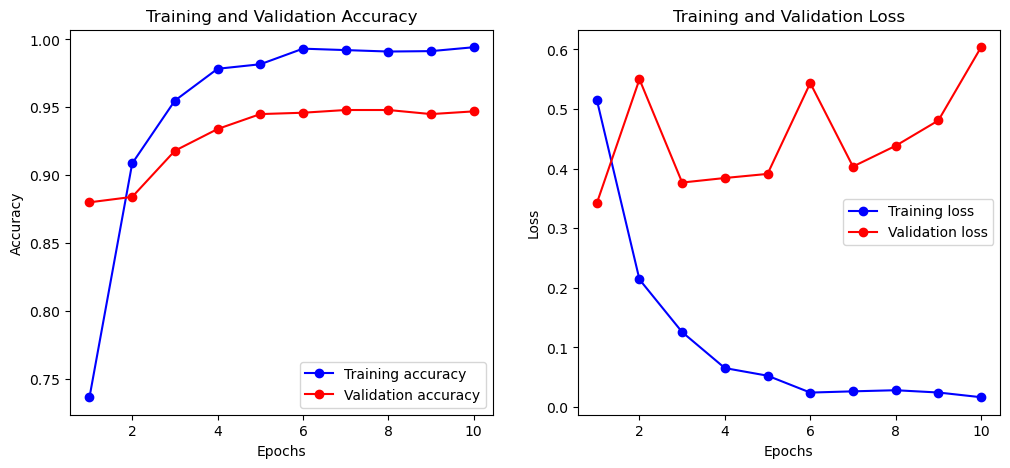

In [10]:
# Extracting data from the history object
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 3.3.5 Model Summary<a id='3.3.5_Model_Summary'></a>

Training Overview:  
* Initial Accuracy: 73.64%  
* Final Training Accuracy: 99.43% after 10 epochs  
* Peak Validation Accuracy: 94.70%  

Insights:  
* The model's accuracy improved markedly across 10 training epochs, achieving near-perfect accuracy on the training data. However, the highest validation accuracy plateaued at 94.70%, indicating a good but not perfect translation of learning to unseen data.
* The divergence between training and validation accuracy, notably after the 5th epoch, suggests the model might be overfitting. This is further evidenced by its excellent performance on training data contrasted with slightly less accuracy on validation data.  

Test Performance:  
* Accuracy on Unseen Test Data: 84.80%
* Loss on Test Data: 1.8783

Conclusions:
* The model demonstrates a solid ability to predict on new data, as shown by the substantial test accuracy. Nevertheless, the relatively high loss on the test set could signal that the model's predictions are not as consistent as we'd like.
* The trend of increasing validation loss, despite better training accuracy, points to a need for better generalization. The model might be learning specifics of the training data that don't apply to the broader dataset.

## 3.4 Reducing Overfitting<a id='3.4_Reducing_Overfitting'></a>

#### 3.4.1 Model Modification<a id='3.4.1_Model_Modification'></a>

* Placing a dropout layer early in the model, right after the first few convolutional and pooling layers. It helps in ensuring that the network does not rely too heavily on specific early-stage features detected by the initial convolutional layers.

* Setting fewer layers and neurons so that the model is less likely to learn noise and irrelevant patterns in the training data.

* Adding L2 regularization in the dense layer to penalize the weights, encouraging the model to maintain smaller weights, leading to a simpler model.

* Adding Early Stopping and Checkpoint to observe potential best model before extra training epoch.

In [11]:
# # Define an updated Neural Networks Model
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.5),  # Adding dropout
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Adding L2 regularization
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 3.4.2 Model_2 Training<a id='3.4.2_Model_2_Training'></a>

In [12]:
# Train the model_2 with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# ModelCheckpoint to save the model at each epoch
checkpoint = ModelCheckpoint('Neural_Networks_Model_2/model_at_epoch_{epoch:02d}', save_best_only=False)

history_2 = model_2.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint],  # Add checkpoint to callbacks
    verbose=2
)

Epoch 1/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_01\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_01\assets


332/332 - 483s - loss: 2.2198 - accuracy: 0.5658 - val_loss: 0.6925 - val_accuracy: 0.6577 - 483s/epoch - 1s/step
Epoch 2/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_02\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_02\assets


332/332 - 485s - loss: 0.5687 - accuracy: 0.7380 - val_loss: 0.6280 - val_accuracy: 0.7124 - 485s/epoch - 1s/step
Epoch 3/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_03\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_03\assets


332/332 - 488s - loss: 0.4766 - accuracy: 0.7987 - val_loss: 0.4691 - val_accuracy: 0.8199 - 488s/epoch - 1s/step
Epoch 4/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_04\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_04\assets


332/332 - 488s - loss: 0.3910 - accuracy: 0.8523 - val_loss: 0.5384 - val_accuracy: 0.7512 - 488s/epoch - 1s/step
Epoch 5/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_05\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_05\assets


332/332 - 489s - loss: 0.4108 - accuracy: 0.8384 - val_loss: 0.3962 - val_accuracy: 0.8378 - 489s/epoch - 1s/step
Epoch 6/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_06\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_06\assets


332/332 - 484s - loss: 0.3702 - accuracy: 0.8580 - val_loss: 0.3985 - val_accuracy: 0.8597 - 484s/epoch - 1s/step
Epoch 7/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_07\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_07\assets


332/332 - 492s - loss: 0.3233 - accuracy: 0.8844 - val_loss: 0.4520 - val_accuracy: 0.7980 - 492s/epoch - 1s/step
Epoch 8/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_08\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_08\assets


332/332 - 492s - loss: 0.3595 - accuracy: 0.8587 - val_loss: 0.3606 - val_accuracy: 0.8567 - 492s/epoch - 1s/step
Epoch 9/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_09\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_09\assets


332/332 - 489s - loss: 0.3157 - accuracy: 0.8847 - val_loss: 0.3692 - val_accuracy: 0.8567 - 489s/epoch - 1s/step
Epoch 10/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_10\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_10\assets


332/332 - 501s - loss: 0.3387 - accuracy: 0.8767 - val_loss: 0.3524 - val_accuracy: 0.8587 - 501s/epoch - 2s/step
Epoch 11/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_11\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_11\assets


332/332 - 494s - loss: 0.3011 - accuracy: 0.8931 - val_loss: 0.3513 - val_accuracy: 0.8736 - 494s/epoch - 1s/step
Epoch 12/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_12\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_12\assets


332/332 - 487s - loss: 0.3007 - accuracy: 0.8896 - val_loss: 0.5162 - val_accuracy: 0.7741 - 487s/epoch - 1s/step
Epoch 13/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_13\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_13\assets


332/332 - 486s - loss: 0.2813 - accuracy: 0.9017 - val_loss: 0.3347 - val_accuracy: 0.8677 - 486s/epoch - 1s/step
Epoch 14/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_14\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_14\assets


332/332 - 496s - loss: 0.2714 - accuracy: 0.9079 - val_loss: 0.3329 - val_accuracy: 0.8856 - 496s/epoch - 1s/step
Epoch 15/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_15\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_15\assets


332/332 - 488s - loss: 0.3208 - accuracy: 0.8854 - val_loss: 0.3563 - val_accuracy: 0.8856 - 488s/epoch - 1s/step
Epoch 16/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_16\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_16\assets


332/332 - 484s - loss: 0.2583 - accuracy: 0.9202 - val_loss: 0.5566 - val_accuracy: 0.8627 - 484s/epoch - 1s/step
Epoch 17/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_17\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_17\assets


332/332 - 485s - loss: 0.2461 - accuracy: 0.9273 - val_loss: 0.3129 - val_accuracy: 0.8886 - 485s/epoch - 1s/step
Epoch 18/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_18\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_18\assets


332/332 - 484s - loss: 0.2409 - accuracy: 0.9313 - val_loss: 0.3242 - val_accuracy: 0.8995 - 484s/epoch - 1s/step
Epoch 19/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_19\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_19\assets


332/332 - 483s - loss: 0.2093 - accuracy: 0.9459 - val_loss: 0.4065 - val_accuracy: 0.8577 - 483s/epoch - 1s/step
Epoch 20/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_20\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_20\assets


332/332 - 485s - loss: 0.2220 - accuracy: 0.9403 - val_loss: 0.3743 - val_accuracy: 0.8736 - 485s/epoch - 1s/step
Epoch 21/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_21\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_21\assets


332/332 - 492s - loss: 0.2233 - accuracy: 0.9383 - val_loss: 0.4308 - val_accuracy: 0.8428 - 492s/epoch - 1s/step
Epoch 22/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_22\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_22\assets


332/332 - 492s - loss: 0.2281 - accuracy: 0.9398 - val_loss: 0.2938 - val_accuracy: 0.9184 - 492s/epoch - 1s/step
Epoch 23/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_23\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_23\assets


332/332 - 494s - loss: 0.1922 - accuracy: 0.9563 - val_loss: 0.3143 - val_accuracy: 0.9254 - 494s/epoch - 1s/step
Epoch 24/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_24\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_24\assets


332/332 - 549s - loss: 0.1992 - accuracy: 0.9528 - val_loss: 0.3183 - val_accuracy: 0.9194 - 549s/epoch - 2s/step
Epoch 25/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_25\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_25\assets


332/332 - 508s - loss: 0.2463 - accuracy: 0.9313 - val_loss: 0.3601 - val_accuracy: 0.9224 - 508s/epoch - 2s/step
Epoch 26/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_26\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_26\assets


332/332 - 491s - loss: 0.1707 - accuracy: 0.9686 - val_loss: 0.3335 - val_accuracy: 0.9124 - 491s/epoch - 1s/step
Epoch 27/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_27\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_2\model_at_epoch_27\assets


332/332 - 489s - loss: 0.2007 - accuracy: 0.9484 - val_loss: 0.5535 - val_accuracy: 0.8318 - 489s/epoch - 1s/step


#### 3.4.3 Model_2 Evaluation<a id='3.4.3_Model_2_Evaluation'></a>  

In [49]:
# Evaluate on the validation set
val_loss_model_2, val_accuracy_model_2 = model_2.evaluate(validation_generator)
print(f'Validation Loss: {val_loss_model_2}')
print(f'Validation Accuracy: {val_accuracy_model_2}')

# Evaluate on the test set
test_loss_model_2, test_accuracy_model_2 = model_2.evaluate(test_generator)
print(f'Test Loss: {test_loss_model_2}')
print(f'Test Accuracy: {test_accuracy_model_2}')

51/51 [==============================] - 12s 238ms/step - loss: 0.5535 - accuracy: 0.8318
Validation Loss: 0.5534642934799194
Validation Accuracy: 0.8318408131599426
50/50 [==============================] - 13s 253ms/step - loss: 1.0149 - accuracy: 0.7620
Test Loss: 1.0149025917053223
Test Accuracy: 0.7620000243186951


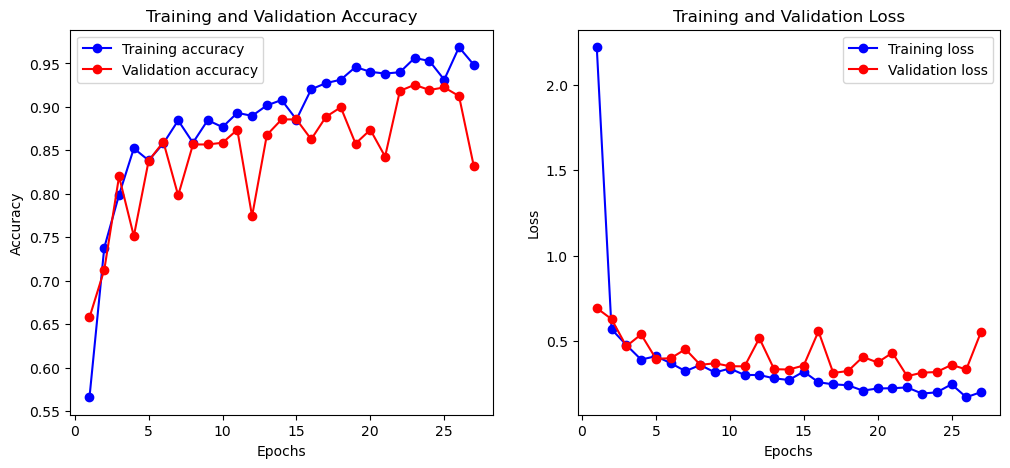

In [14]:
# Extracting data from the history object
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

After Epoch 23, the model achieves its peak in validation accuracy and also records a low loss, suggesting that this epoch could potentially represent the model's optimal performance across all epochs.

#### 3.4.4 Epoch Review<a id='3.4.4_Epoch_Review'></a>  

In [24]:
# Load the model saved at Epoch 23
model_2_epoch_23 = load_model('Neural_Networks_Model_2/model_at_epoch_23')

# Evaluate the model on the test set
val_loss_model_2_epoch_23, val_accuracy_model_2_epoch_23 = model_2_epoch_23.evaluate(validation_generator)
print(f'Validation Loss for Epoch 23: {val_loss_model_2_epoch_23}')
print(f'Validation for Epoch 23: {val_accuracy_model_2_epoch_23}')

# Evaluate the model on the test set
test_loss_model_2_epoch_23, test_accuracy_model_2_epoch_23 = model_2_epoch_23.evaluate(test_generator)
print(f'Test Loss for Epoch 23: {test_loss_model_2_epoch_23}')
print(f'Test Accuracy for Epoch 23: {test_accuracy_model_2_epoch_23}')

51/51 [==============================] - 23s 435ms/step - loss: 0.3143 - accuracy: 0.9254
Validation Loss for Epoch 23: 0.31428778171539307
Validation for Epoch 23: 0.9253731369972229
50/50 [==============================] - 22s 442ms/step - loss: 0.6520 - accuracy: 0.8030
Test Loss for Epoch 23: 0.6519652009010315
Test Accuracy for Epoch 23: 0.8029999732971191


#### 3.4.5 Model_2 Summary<a id='3.4.5_Model_2_Summary'></a>  

Model 2 Final Evaluation:

* Validation Loss: 0.5535
* Validation Accuracy: 83.18%
* Test Loss: 1.0149
* Test Accuracy: 76.20%

Model 2 Evaluation at Epoch 23:

* Validation Loss: 0.3143
* Validation Accuracy: 92.54%
* Test Loss: 0.6520
* Test Accuracy: 80.30%

Comparison and Conclusion:

Model 2's performance at Epoch 23 surpasses that of the final model in every key metric, including validation loss, validation accuracy, test loss, and test accuracy. Consequently, Epoch 23 of Model 2 emerges as the most effective iteration, presenting a robust balance between accuracy and loss minimization. Therefore, for further evaluation and potential deployment, Epoch 23 will be selected as the optimal representation of Model 2.

## 3.5 Advanced Model<a id='3.5_Advanced_Model'></a>

Following the testing of Models 1 and 2, it was observed that while Model 1 demonstrates higher test accuracy, Model 2 excels with a lower loss value and better management of overfitting issues. Therefore, Model 3 will be developed, taking into account the strengths of both previous models to optimize performance.

#### 3.5.1 Model_3 Developing<a id='3.5.1_Model_3_Developing'></a>

In [15]:
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # Reduced number of neurons
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 3.5.2 Model_3 Training<a id='3.5.2_Model_3_Training'></a>

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

checkpoint = ModelCheckpoint('Neural_Networks_Model_3/model_at_epoch_{epoch:02d}', save_best_only=False)

history_3 = model_3.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint],  # Add checkpoint to callbacks
    verbose=2
)

Epoch 1/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_01\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_01\assets


332/332 - 598s - loss: 4.6283 - accuracy: 0.8076 - val_loss: 13.5360 - val_accuracy: 0.6239 - 598s/epoch - 2s/step
Epoch 2/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_02\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_02\assets


332/332 - 601s - loss: 1.5053 - accuracy: 0.8441 - val_loss: 2.1026 - val_accuracy: 0.8209 - 601s/epoch - 2s/step
Epoch 3/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_03\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_03\assets


332/332 - 617s - loss: 1.0760 - accuracy: 0.8779 - val_loss: 1.5690 - val_accuracy: 0.8537 - 617s/epoch - 2s/step
Epoch 4/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_04\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_04\assets


332/332 - 622s - loss: 0.8365 - accuracy: 0.8714 - val_loss: 1.0093 - val_accuracy: 0.8488 - 622s/epoch - 2s/step
Epoch 5/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_05\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_05\assets


332/332 - 595s - loss: 0.6903 - accuracy: 0.8829 - val_loss: 1.1619 - val_accuracy: 0.7970 - 595s/epoch - 2s/step
Epoch 6/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_06\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_06\assets


332/332 - 587s - loss: 0.6329 - accuracy: 0.8753 - val_loss: 0.8346 - val_accuracy: 0.8896 - 587s/epoch - 2s/step
Epoch 7/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_07\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_07\assets


332/332 - 596s - loss: 0.6236 - accuracy: 0.8881 - val_loss: 1.6160 - val_accuracy: 0.7622 - 596s/epoch - 2s/step
Epoch 8/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_08\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_08\assets


332/332 - 594s - loss: 0.6158 - accuracy: 0.8991 - val_loss: 1.2746 - val_accuracy: 0.8995 - 594s/epoch - 2s/step
Epoch 9/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_09\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_09\assets


332/332 - 590s - loss: 0.6036 - accuracy: 0.8892 - val_loss: 0.7431 - val_accuracy: 0.9224 - 590s/epoch - 2s/step
Epoch 10/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_10\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_10\assets


332/332 - 597s - loss: 0.5839 - accuracy: 0.9023 - val_loss: 0.8690 - val_accuracy: 0.8617 - 597s/epoch - 2s/step
Epoch 11/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_11\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_11\assets


332/332 - 600s - loss: 0.6520 - accuracy: 0.9023 - val_loss: 1.2792 - val_accuracy: 0.8557 - 600s/epoch - 2s/step
Epoch 12/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_12\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_12\assets


332/332 - 595s - loss: 0.6434 - accuracy: 0.9071 - val_loss: 0.9751 - val_accuracy: 0.9154 - 595s/epoch - 2s/step
Epoch 13/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_13\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_13\assets


332/332 - 597s - loss: 0.7196 - accuracy: 0.9129 - val_loss: 1.3119 - val_accuracy: 0.7642 - 597s/epoch - 2s/step
Epoch 14/50
INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_14\assets


INFO:tensorflow:Assets written to: Neural_Networks_Model_3\model_at_epoch_14\assets


332/332 - 593s - loss: 0.7735 - accuracy: 0.9193 - val_loss: 4.5677 - val_accuracy: 0.8577 - 593s/epoch - 2s/step


#### 3.5.3 Model_3 Evaluation<a id='3.5.3_Model_3_Evaluation'></a>

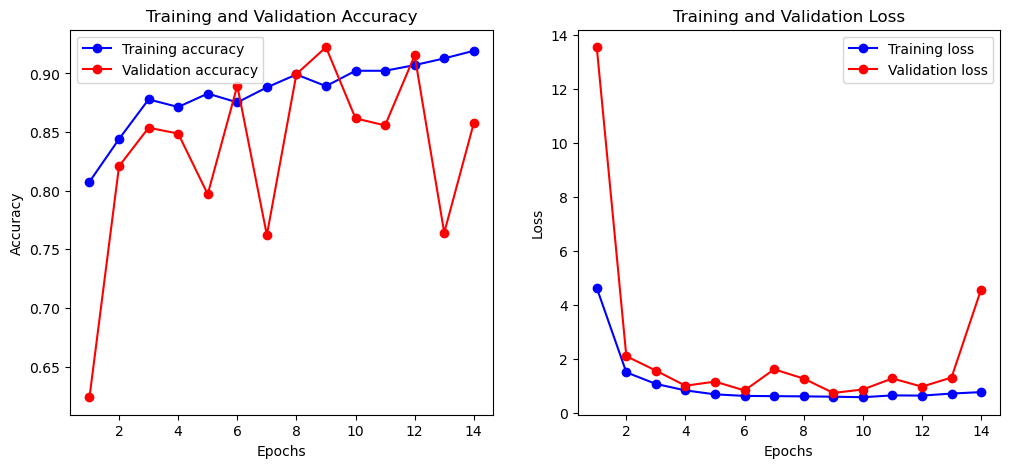

In [17]:
# Extracting data from the history object
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Based on the evaluation of Model 3 across different epochs, Epochs 9 and 12 were identified as having notably better performance, as evidenced by their validation accuracy and loss trends. These two epochs were specifically chosen for a more detailed evaluation to assess their performance on test data.

#### 3.5.4 Epoch Review<a id='3.5.4_Epoch_Review'></a>

In [22]:
# Load the model saved at Epoch 12
model_3_epoch_12 = load_model('Neural_Networks_Model_3/model_at_epoch_12')

# Evaluate the model on the test set
val_loss_model_3_epoch_12, val_accuracy_model_3_epoch_12 = model_3_epoch_12.evaluate(validation_generator)
print(f'Validation Loss for Epoch 12: {val_loss_model_3_epoch_12}')
print(f'Validation for Epoch 12: {val_accuracy_model_3_epoch_12}')

# Evaluate the model on the test set
test_loss_model_3_epoch_12, test_accuracy_model_3_epoch_12 = model_3_epoch_12.evaluate(test_generator)
print(f'Test Loss for Epoch 12: {test_loss_model_3_epoch_12}')
print(f'Test Accuracy for Epoch 12: {test_accuracy_model_3_epoch_12}')

51/51 [==============================] - 20s 385ms/step - loss: 0.9751 - accuracy: 0.9154
Validation Loss for Epoch 12: 0.9750609993934631
Validation for Epoch 12: 0.9154228568077087
50/50 [==============================] - 19s 379ms/step - loss: 2.0453 - accuracy: 0.8330
Test Loss for Epoch 12: 2.0453126430511475
Test Accuracy for Epoch 12: 0.8330000042915344


In [27]:
# Load the model saved at Epoch 9
model_3_epoch_9 = load_model('Neural_Networks_Model_3/model_at_epoch_09')

# Evaluate the model on the test set
val_loss_model_3_epoch_9, val_accuracy_model_3_epoch_9 = model_3_epoch_9.evaluate(validation_generator)
print(f'Validation Loss for Epoch 9: {val_loss_model_3_epoch_9}')
print(f'Validation for Epoch 9: {val_accuracy_model_3_epoch_9}')

# Evaluate the model on the test set
test_loss_model_3_epoch_9, test_accuracy_model_3_epoch_9 = model_3_epoch_9.evaluate(test_generator)
print(f'Test Loss for Epoch 9: {test_loss_model_3_epoch_9}')
print(f'Test Accuracy for Epoch 9: {test_accuracy_model_3_epoch_9}')

51/51 [==============================] - 21s 401ms/step - loss: 0.7431 - accuracy: 0.9224
Validation Loss for Epoch 9: 0.7430676221847534
Validation for Epoch 9: 0.9223880767822266
50/50 [==============================] - 20s 401ms/step - loss: 1.4000 - accuracy: 0.8170
Test Loss for Epoch 9: 1.4000415802001953
Test Accuracy for Epoch 9: 0.8169999718666077


#### 3.5.5 Model_3 Summary<a id='3.5.5_Model_3_Summary'></a>

Model 3 Evaluation at Epoch 12:

* Validation Loss: 0.9751
* Validation Accuracy: 91.54%
* Test Loss: 2.0453
* Test Accuracy: 83.30%

Model 3 Evaluation at Epoch 9:

* Validation Loss: 0.7431
* Validation Accuracy: 92.24%
* Test Loss: 1.4000
* Test Accuracy: 81.70%

Comparison and Conclusion:
* Epoch 12 has higher test accuracy but also a higher test loss, while Epoch 9 has slightly lower accuracy but also a lower test loss. Epoch 12 exhibits worse overfitting than Epoch 9 because it was trained for 3 more epochs. Both epochs will be retained for further model selection.

## 3.6 Summary<a id='3.6_Summary'></a>

#### 3.6.1 Model Selection<a id='3.6.1 Model Selection'></a>

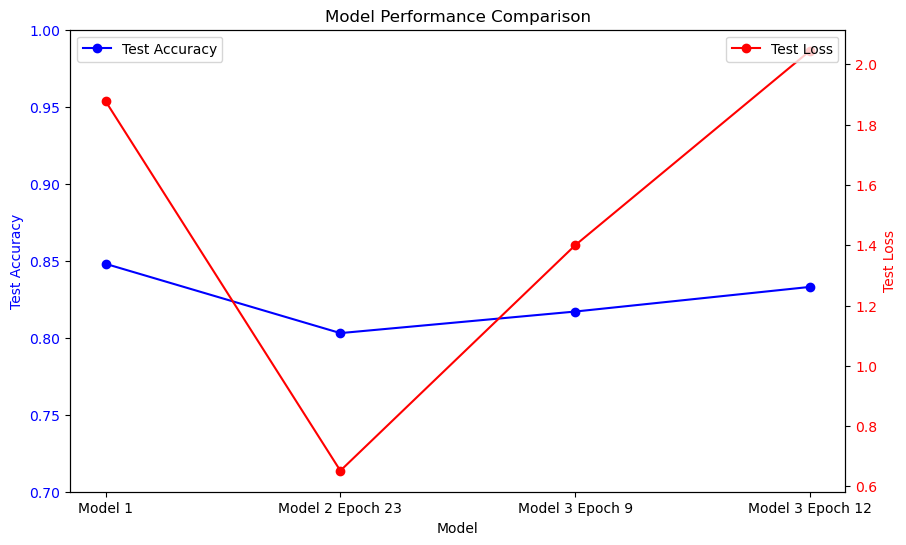

In [50]:
# Define the model names
models = ['Model 1', 'Model 2 Epoch 23', 'Model 3 Epoch 9', 'Model 3 Epoch 12']

# Define data for the plots
accuracy_values = [test_accuracy, test_accuracy_model_2_epoch_23, test_accuracy_model_3_epoch_9, test_accuracy_model_3_epoch_12]
loss_values = [test_loss, test_loss_model_2_epoch_23, test_loss_model_3_epoch_9, test_loss_model_3_epoch_12]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy on the primary Y-axis
ax1.plot(models, accuracy_values, 'bo-', label='Test Accuracy')
ax1.set_title('Model Performance Comparison')
ax1.set_xlabel('Model')
ax1.set_ylabel('Test Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Adjust the Y-axis range for accuracy to start from a specific value (e.g., 0.7)
ax1.set_ylim([0.7, 1])  # Adjust as needed

# Create a second Y-axis for loss
ax2 = ax1.twinx()
ax2.plot(models, loss_values, 'ro-', label='Test Loss')
ax2.set_ylabel('Test Loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

Based on the comprehensive analysis of the four models, Model 2 at Epoch 23 has been identified as the preferred choice. While all models exhibit similar test accuracies, ranging from 80.30% to 84.80%, Model 2 at Epoch 23 distinguishes itself with the lowest test loss of 0.65. This lower loss indicates a more effective balance between fitting the current dataset and generalizing to new data, a crucial aspect for future applications. In scenarios where the model will predict 'ok' or 'defective' labels for upcoming products, this balance is particularly valuable. The ability to adapt to data variations makes Model 2 at Epoch 23 the optimal model for this application.

In [65]:
# Save the model_3_epoch_12 as CQC_4_Final_Model
model_3_epoch_12.save('CQC_4_Final_Model')

INFO:tensorflow:Assets written to: CQC_4_Final_Model\assets


INFO:tensorflow:Assets written to: CQC_4_Final_Model\assets


#### 3.6.2 Future Steps<a id='3.6.2_Future_Steps'></a>

- **Continuous Monitoring and Training:** Regular evaluation of the model with new data to ensure consistent performance. If necessary, further tuning and retraining should be conducted to adapt to new data characteristics.
- **Enhancement with More Data:** As more data becomes available, it should be used to continually improve the model, potentially increasing its accuracy while maintaining or improving its ability to generalize.
- **Application Integration:** Integrating the model into the quality control process, ensuring seamless operation and real-time classification to enhance overall efficiency and reliability.